<a href="https://colab.research.google.com/github/Binod-budathoki/Analyzing_selling_price_of_used_cars/blob/main/PythonDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Automobile_data.csv', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950


In [5]:
headerList =["symboling" , "normalized-losses" , "make" , "fuel-type" , "aspiration" , "num-of-doors" , "body-style" , "drive-wheels" , "engine-location" , "wheel-base" , "length" , "width" , "height" , "curb-weight" , "engine-type" , "num-of-cylinders" , "engine-size" , "fuel-system" , "bore" , "stroke" , "compression-ratio" , "horsepower" , "peak-rpm" , "city-mpg" , "highway-mpg" , "price" ]

In [6]:
df.columns=headerList

In [8]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950


In [9]:
#removing the 0th row cause headers were included there
df= df.drop([0], axis=0)

In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [ ]:
#Exporting pandas dataframe to CSV
path="/content/drive/MyDrive/Colab Notebooks/automobile.csv"
df.to_csv(path)

In [ ]:
df.dtypes

symboling            object
normalized-losses    object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base           object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
dtype: object

In [11]:
df.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,6,52,22,2,2,3,5,3,2,53,75,44,49,171,7,7,44,8,39,37,32,60,24,29,30,187
top,0,?,toyota,gas,std,four,sedan,fwd,front,94.5,157.3,63.8,50.8,2385,ohc,four,92,mpfi,3.62,3.4,9,68,5500,31,25,?
freq,67,41,32,185,168,114,96,120,202,21,15,24,14,4,148,159,15,94,23,20,46,19,37,28,19,4


In [ ]:
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,6,52,22,2,2,3,5,3,2,53,75,44,49,171,7,7,44,8,39,37,32,60,24,29,30,187
top,0,?,toyota,gas,std,four,sedan,fwd,front,94.5,157.3,63.8,50.8,2385,ohc,four,122,mpfi,3.62,3.4,9,68,5500,31,25,?
freq,67,41,32,185,168,114,96,120,202,21,15,24,14,4,148,159,15,94,23,20,46,19,37,28,19,4


In [ ]:
#function shows top 30 as well as bottom 30 rows
df.info()

In [12]:
from io import StringIO

**SIMPLE PANDAS METHODS**


In [ ]:
#dealing with missing values
#drop the variable
#drop the data entry
#replacing the data entry -> By average value of entire col
#categorical variables like fuel types (Try use the most common like the gasoline for fuel type)
#leave it as missing

#df.dropna()
#axis=0  drops entire row
#axis=1  drops entire column
#df.dropna(subset=["price"], axis=0, implace = True)

#calculate mean of the column and replace the missing value with the mean value

#df.normalized-losses =pd.to_numeric(df.normalized-losses, errors ='coerce').fillna(0).astype('int')
#mean = df["normalized-losses"].mean();
#mean


In [13]:
# 
# df['normalized-losses'].fillna(df['normalized-losses'].mean())

# df.replace('?', 0)
df['normalized-losses'] = df['normalized-losses'].replace('?', 0)

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [15]:
#calculating mean value from normalized-losses column
vals = pd.to_numeric(df["normalized-losses"], errors='coerce')
df["normalized-losses"] = vals.fillna(vals.mean()) 
#data from jpp
print (vals.mean())

97.6


In [16]:
#Conversion of Object data type in int data type

df['city-mpg']=df["city-mpg"].astype("int")

df["city-mpg"]


1      21
2      21
3      19
4      24
5      18
       ..
201    23
202    19
203    18
204    26
205    19
Name: city-mpg, Length: 205, dtype: int64

In [17]:
#convert city miles per gallon(mpg) to liters per 100kms by dividing 235 each values
df["city-mpg"] = 235/df["city-mpg"]
df["city-mpg"]

1      11.190476
2      11.190476
3      12.368421
4       9.791667
5      13.055556
         ...    
201    10.217391
202    12.368421
203    13.055556
204     9.038462
205    12.368421
Name: city-mpg, Length: 205, dtype: float64

In [18]:
#rename the column name using df.replace() city-mpg to city-L/100km
df.rename(columns={"city-mpg":"city-L/100km"},inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,11.190476,27,13495
2,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,11.190476,27,16500
3,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,12.368421,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,9.791667,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,13.055556,22,17450


In [ ]:
#Data Normalization for data preprocessing
#ways : 1. Simple feature Scaling 2. MinMax 3.Z-score
df["length"]=df["length"].astype(float)
df ["length"]=df["length"]/df["length"].max()
#df["length"]
#1 minmax method
df["length"] = (df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())
#result using first Method: Xnew=Xold/Xmax
#df["length"]
#result using second method: Xnew=Xold-Xmin/Xmax-Xmin
df["length"]=(df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())
#df["length"]

#result using third method known as Z-score or Standard Score method: Xnew=Xold-meu/sigma 
#meu = average of feature sigma= sd of range(-3 -3)
df["length"]  =(df["length"]-df["length"].mean())/df["length"].std()
df["length"]



1     -0.425480
2     -0.425480
3     -0.230948
4      0.206750
5      0.206750
         ...   
201    1.195622
202    1.195622
203    1.195622
204    1.195622
205    1.195622
Name: length, Length: 205, dtype: float64

In [24]:
#Binning in Python
# grouping in set of nuymerical values  i.e. converting numerical to categorical values
#"price" is a feature from range 5000  to 45000 Using Binning 3 bins are of like
# low: 5k-17k  medium:17k-35k   high: 35-45k

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
sns.set_style('whitegrid')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03c6efdc50>]],
      dtype=object)

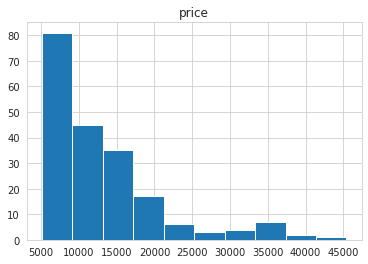

In [21]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['price'].dtypes
#Plotting price column to histogram
df.hist(column='price')


In [22]:
#For binning we first use numpy linspace function to 4 equally spaced numbers
bins =np.linspace(min(df['price']),max(df["price"]), 4)
group_names=["Low","Medium","High"]
df["price-binned"]=pd.cut(df["price"], bins,labels=group_names, include_lowest=True)
#df["price-binned"].dtypes

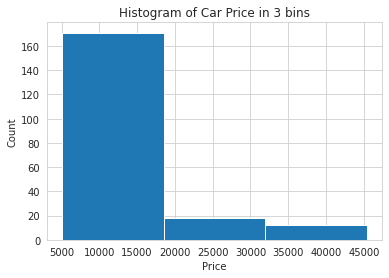

In [25]:
# binning- grouping values
bins = np.linspace(min( df['price']), max(df['price']), 4) 
group_names = ['Low', 'Medium', 'High']
df['price-binned'] = pd.cut(df['price'], bins,labels = group_names, include_lowest = True)
  
#print(df['price-binned'])
#plt.hist(df['price-binned'])

df['price'].plot(kind='hist',bins=3, title= "Histogram of Car Price in 3 bins")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [32]:
#Categorical Values to Numerical one By converting them in specific features
#one hot encoding (Dummy variables in Python Pandas)
pd.get_dummies(df["fuel-type"]).head()
 
# descriptive analysis
# NaN are skipped
#df.describe()


,diesel,gas
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1


## Exploratory Data Analysis
 
1.   Summerize main characterstics of Data
2.   Gain better understanding of data set
3.   Uncover relationship between variables and extract important variables

##Question:
What are the characterstics which have the most impact on the car price?

##Descriptive Statistics
1. describes basic features of data
2. give short summeries about the sample and measures the data



In [35]:
##Descriptive Statistics
#GroupBy
#Correlation
#Pearson Correlation

### METHODS => describe(), value_counts()
### Summerize the categorical value data:
drive_wheels_counts=df["drive-wheels"].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive_wheels':"vlaue_counts"}, inplace=True)
drive_wheels_counts

,drive-wheels
fwd,120
rwd,76
4wd,9


### BOX PLOT 
The main features that the box plot shows, are the median of the data,
which represents where the middle data point is.
The upper quartile shows where the 75th percentile is.
The lower quartile shows where the 25th percentile is.
The data between the upper and lower quartile represents the interquartile range.
Next you have the lower and upper extremes.
These are calculated as 1.5 times the interquartile range, above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.
Finally, box plots also display outliers as individual dots that occur outside the upper and lower extremes.
With box plots, you can easily spot outliers, and also see the distribution and skewness of the data. Box plots make it easy to compare between groups.

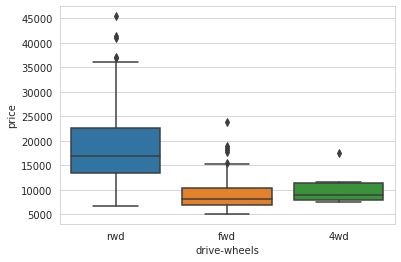

In [36]:
sns.boxplot(x="drive-wheels", y="price",data=df)

##Scatter plot
1. Each observationcan be represented as a pont
2. Scatter plot shows the relationship between the two variables.
3. Relnship between Engine size and price (Good engine size -> higher price)
___________________________
1. Predictor/independent variables on X-axis
2. Target/dependent variables on Y-axis

In [57]:
df["engine-size"]=df["engine-size"].astype("float")
df["engine-size"]

1      130.0
2      130.0
3      152.0
4      109.0
5      136.0
       ...  
201    141.0
202    141.0
203    173.0
204    145.0
205    141.0
Name: engine-size, Length: 205, dtype: float64

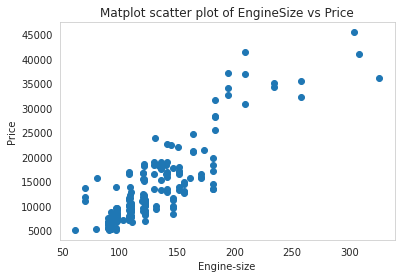

In [59]:
plt.scatter(df["engine-size"],df["price"])
plt.title('Matplot scatter plot of EngineSize vs Price')
plt.xlabel("Engine-size")
plt.ylabel("Price")
plt.grid()
plt.show()

##Groupby():Grouping the data
1. Can be applied on categorical variables
2. Group data into categories
3. Single or Multiple Variables

###Q. Finding the average price of vehicles and observe how they differ between different types of body styles and drive wheels variables.

In [62]:
df["body-style"]

1      convertible
2      convertible
3        hatchback
4            sedan
5            sedan
          ...     
201          sedan
202          sedan
203          sedan
204          sedan
205          sedan
Name: body-style, Length: 205, dtype: object

In [69]:
df_test = df[["drive-wheels","body-style","price"]]
df_test
# df_group  =df.groupby("drive-wheels")
df_group = df_test.groupby(["drive-wheels","body-style"], as_index=False).mean()
df_group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### Pivot() method
One variable displays along the column and other variable displayed along the rows

In [71]:
df_pivot=df_group.pivot(index='drive-wheels', columns="body-style")
df_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

## Heatmap Plot
-> Plot target variables over multiple variables

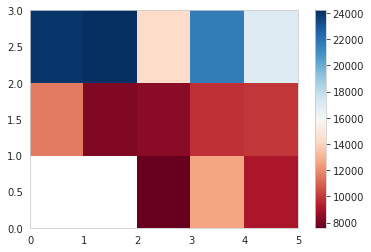

In [74]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

### CORRELATION
-- Measures to what extent different variables are interdependent( if one variable changes how does it effect the another variable)

eg:
 Smoking -> Lung Cancer
 Rain -> umbrella
 
 #### Correlatiion betn Engine-size and Price (to know whether there is  any impact on Price due to Engine Size






(0.0, 53221.224852278145)

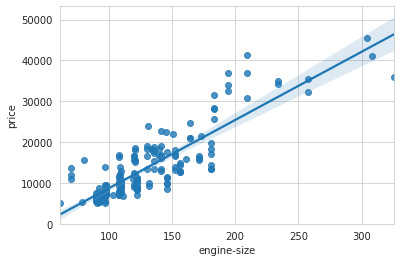

In [75]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

##Result: 
###GOAL : 
Whether the engine-size has any impact to the price ?
---------------------
Result obtained: Straight line through the data point is va\ery steep which shows there is a positive linear relationship between these two variables
#####WITH the increase in value of Engine Size value of Price Go Up as well and the slope of the line is positive.So there is a  positive correlation between engine_size and Price.

In [78]:
#Conversion of object type to integer type
df["highway-mpg"]=df["highway-mpg"].astype(int)

(0.0, 48176.70631112798)

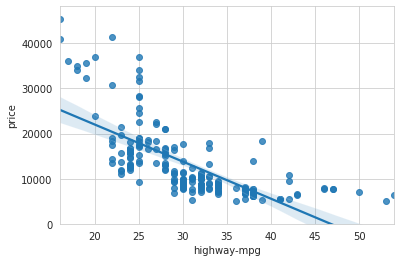

In [79]:
#Another relationship between Highway Miles per gallon(highway-mpg) and  price
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)



##Result: Negative linear relationship between the highway-mpg and price 

#### When highway-mpg values goes up the price goes down therefore there is a negative linear relationship between highway-mpg and price.
________________________________________
Although this relationship is negative the slope of the line is steep
which means that the highway miles per gallon is still a good predictor of price.

### Since Weak Correlation between Two features (peak_rpm and price) so we cannot use rpm to predict the values
##### Since, both low peak RPM and high values of peak RPM have low and high prices.Therefore, we cannot use RPM to predict the values.


(0.0, 47414.1)

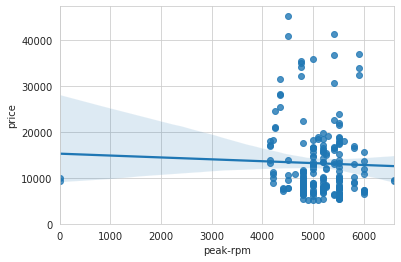

In [88]:
#CONVERTING peak_rpm '?' values into '0' values
df['peak-rpm'] = df['peak-rpm'].replace('?', 0)

#displaying peak_rpm value
df["peak-rpm"]

#converting object type into the int type value of peak_rpm
df["peak-rpm"]=df["peak-rpm"].astype(int)

sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

### PEARSON CORRELATION
1. Measures the strength of the correlation between two features.

*   correlation coefficient
*   P-value

##### * Correlation Coefficient
* Close to +1: Large Positive relationship
* Close to -1: Large Negative relationship
* Close to 0: No relationship
##### * P-value
* P-value <0.001 Strong certainity in the result
* P-value <0.5 Moderate certainity in the result
* P-value <0.1 Weak certainty in the result
*P-value >0.1 No certainty in the result


#### Strong Correlation
* Correlation Coefficient close to -1 or 1
* P value less tha 0.001

#### Correlation between horsepower and price
* We can see that the correlation efficient is approximately.8, and this is close to 1.
So there is a strong positive correlation. 


In [91]:
import scipy.stats
from scipy import stats, optimize, interpolate
import scipy
scipy.stats

<module 'scipy.stats' from '/usr/local/lib/python3.7/dist-packages/scipy/stats/__init__.py'>

In [109]:
#Checking overll NAN values
#df.isna().any()

#CONVERTING horsepower's '?' values into '0' values
df['horsepower'] = df['horsepower'].replace('?', 0)
# df["horsepower"]
df["horsepower"].fillna(0, inplace=True)

#Checking the NAN values of column Price
df[df['price'].isnull()]
# df["price"]

#CONVERTING price's '?' values into '0' values
df['price'] = df['price'].replace('?', 0)

df["price"].fillna(0, inplace=True)



#converting horsepower object type to float type
# df["horsepower"]=df["horsepower"].astype(float)
# df["horsepower"].dtypes

pearson_coef, p_value = stats.pearsonr(df["horsepower"],df["price"])


In [112]:
pearson_coef

0.6912878787942788

In [113]:
p_value

1.8175735366187956e-30

## Correlation Heatmap
The color scheme indicates the Pearson correlation coefficient,
indicating the strength of the correlation between two variables.
We can see a diagonal line with a dark red color,
indicating that all the values on this diagonal are highly correlated.
This makes sense because when you look closer,
the values on the diagonal are the correlation of all variables with themselves,
which will be always 1.
This correlation heatmap gives us a good overview
of how the different variables are related to one another and,
most importantly, how these variables are related to price.

In [117]:
df.corr()

,normalized-losses,engine-size,horsepower,peak-rpm,city-L/100km,highway-mpg,price
normalized-losses,1.000000,-0.301343,-0.182771,0.240000,-0.205526,0.171033,-0.237939
engine-size,-0.301343,1.000000,0.781577,-0.176800,0.744952,-0.677470,0.838097
horsepower,-0.182771,0.781577,1.000000,0.269931,0.841073,-0.747013,0.691288
peak-rpm,0.240000,-0.176800,0.269931,1.000000,0.075315,-0.039868,-0.055278
city-L/100km,-0.205526,0.744952,0.841073,0.075315,1.000000,-0.928767,0.746992
highway-mpg,0.171033,-0.677470,-0.747013,-0.039868,-0.928767,1.000000,-0.687675
price,-0.237939,0.838097,0.691288,-0.055278,0.746992,-0.687675,1.000000


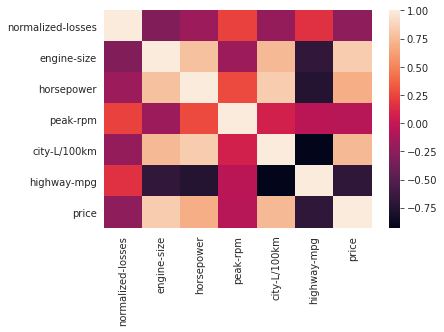

In [118]:
sns.heatmap(df.corr())

## Analysis of Variance- ANOVA

In [116]:
# Analysis of Variance- ANOVA
# returns f-test and p-value
# f-test = variance between sample group means divided by 
# variation within sample group
# p-value = confidence degree
data_annova = df[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = scipy.stats.f_oneway(
                             grouped_annova.get_group('honda')['price'],
                             grouped_annova.get_group('subaru')['price']
                                    )
print(annova_results_l)
# strong corealtion between a categorical variable
# if annova test gives large f-test and small p-value

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
